#### Path similarity

I. Towards writing clear instructions

1. Towards a concise and detailed query.

First prompt (simple) in English and Darija. Input is in Darija.


In [2]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs.csv')

client = OpenAI()

def p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لنجليزية."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "You will be provided with a verb in Moroccan Darija language, and your task is to translate it into English."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content
def p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لفعل انجليزي مجرد المصدر."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "You will be provided with a verb in Moroccan Darija language, and your task is to translate it to a bare-infinitive English verb."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content

def p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", 
             "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لنجليزية." +
                "الترجمة خصها تكون فعل مجرد المصدر بلا تفسيرات."
             },
            {"role": "user", 
             "content": f"{verb}"
             },
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", 
             "content": 
                "Translate the provided Moroccan Darija dialect verb into English." + 
                "The translation must be a bare-infinitive verb without explanations."
            },
            {"role": "user", 
             "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر." +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."
             },
            {"role": "user", "content": f"{verb}"},
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": 
             "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb. " + 
             "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content
 # temperature: What sampling temperature to use, between 0 and 2. Higher values like 0.8 will make the output more random, while lower values like 0.2 will make it more focused and deterministic. We generally recommend altering this or top_p but not both.
# to be included in report

In [3]:

dataset = df.copy()
columns_to_delete = ['n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

dataset['p1_transl'] = dataset['darija_ar'].apply(p1_translate_)
dataset['eng_p1_transl'] = dataset['darija_ar'].apply(eng_p1_translate_)
dataset['p2_transl'] = dataset['darija_ar'].apply(p2_translate_)
dataset['eng_p2_transl'] = dataset['darija_ar'].apply(eng_p2_translate_)
dataset['p3_transl'] = dataset['darija_ar'].apply(p3_translate_)
dataset['eng_p3_transl'] = dataset['darija_ar'].apply(eng_p3_translate_)
dataset['p4_transl'] = dataset['darija_ar'].apply(p4_translate_)
dataset['eng_p4_transl'] = dataset['darija_ar'].apply(eng_p4_translate_)

In [10]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn


eng = dataset['eng']
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p2_transl = dataset['p2_transl']
eng_p2_transl = dataset['eng_p2_transl']
p3_transl = dataset['p3_transl']
eng_p3_transl = dataset['eng_p3_transl']
p4_transl = dataset['p4_transl']
eng_p4_transl = dataset['eng_p4_transl']

p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]
p2_transl = [verb.replace(" ", "_") for verb in p2_transl]
eng_p2_transl = [verb.replace(" ", "_") for verb in eng_p2_transl]
p3_transl = [verb.replace(" ", "_") for verb in p3_transl]
eng_p3_transl = [verb.replace(" ", "_") for verb in eng_p3_transl]
p4_transl = [verb.replace(" ", "_") for verb in p4_transl]
eng_p4_transl = [verb.replace(" ", "_") for verb in eng_p4_transl]

eng = [verb.replace(" ", "_") for verb in eng]


def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results

results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)
results_p2 = evaluate_pairs(p2_transl)
results_eng_p2 = evaluate_pairs(eng_p2_transl)
results_p3 = evaluate_pairs(p3_transl)
results_eng_p3 = evaluate_pairs(eng_p3_transl)
results_p4 = evaluate_pairs(p4_transl)
results_eng_p4 = evaluate_pairs(eng_p4_transl)

dataset['similariy_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]
dataset['similarity_p2'] = [item[2] for item in results_p2]
dataset['similarity_eng_p2'] = [item[2] for item in results_eng_p2]
dataset['similarity_p3'] = [item[2] for item in results_p3]
dataset['similarity_eng_p3'] = [item[2] for item in results_eng_p3]
dataset['similarity_p4'] = [item[2] for item in results_p4]
dataset['similarity_eng_p4'] = [item[2] for item in results_eng_p4]

p1_s = dataset['similariy_p1']
ep1_s = dataset['similarity_eng_p1']
p2_s = dataset['similarity_p2'] 
ep2_s = dataset['similarity_eng_p2'] 
p3_s = dataset['similarity_p3'] 
ep3_s = dataset['similarity_eng_p3'] 
p4_s = dataset['similarity_p4'] 
ep4_s = dataset['similarity_eng_p4']

p1= dataset['similariy_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()
p2= dataset['similarity_p2'].mean()
ep2= dataset['similarity_eng_p2'].mean()
p3= dataset['similarity_p3'].mean()
ep3= dataset['similarity_eng_p3'].mean()
p4= dataset['similarity_p4'].mean()
ep4= dataset['similarity_eng_p4'].mean()

print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
print(f'Mean value of similarities in the second darija prompt is: {p2}')
print(f'Mean value of similarities in the second englsih prompt is: {ep2}')
print(f'Mean value of similarities in the third darija prompt is: {p3}')
print(f'Mean value of similarities in the third english prompt is: {ep3}')
print(f'Mean value of similarities in the fourth darija prompt is: {p4}')
print(f'Mean value of similarities in the fourth english prompt is: {ep4}')
dataset.describe()



Mean value of similarities in the first darija prompt is: 0.10536790943767689
Mean value of similarities in the first english prompt is: 0.4563080034737011
Mean value of similarities in the second darija prompt is: 0.4389168997453881
Mean value of similarities in the second englsih prompt is: 0.3665012635942868
Mean value of similarities in the third darija prompt is: 0.5322769957217632
Mean value of similarities in the third english prompt is: 0.47515644078144076
Mean value of similarities in the fourth darija prompt is: 0.5815790905907184
Mean value of similarities in the fourth english prompt is: 0.5900843046918629


,similariy_p1,similarity_eng_p1,similarity_p2,similarity_eng_p2,similarity_p3,similarity_eng_p3,similarity_p4,similarity_eng_p4
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,0.105368,0.456308,0.438917,0.366501,0.532277,0.475156,0.581579,0.590084
std,0.286966,0.437000,0.431291,0.432776,0.423600,0.427806,0.378153,0.388625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.250000,0.250000
50%,0.000000,0.333333,0.250000,0.166667,0.500000,0.333333,0.500000,0.500000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


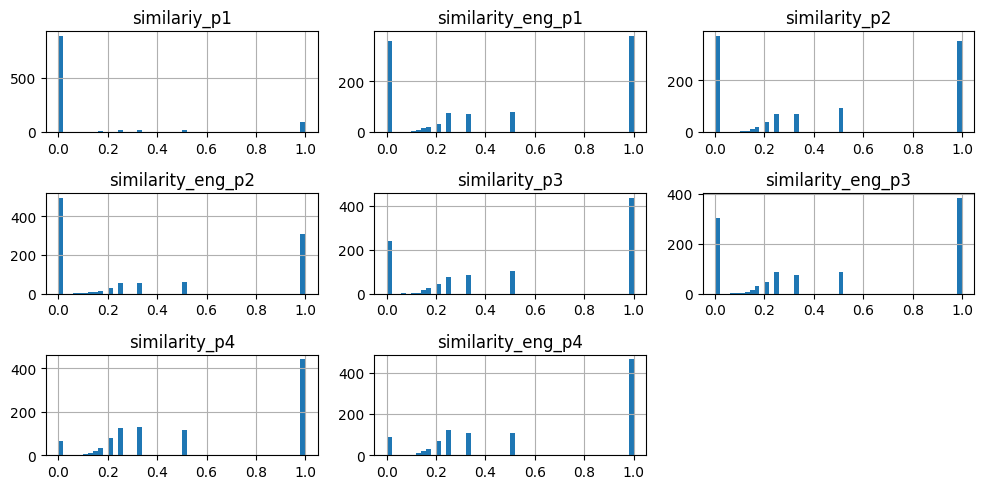

In [11]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.xlabel('Similarity (%)')
plt.ylabel('Count of pair verbs')
plt.title('Similarity histogram')
plt.tight_layout()
plt.grid(True)
plt.show()


In [17]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(p4_s, ep4_s)


print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference between the fourth prompts written in English and Darija")
else:
    print("No significant difference between the frouth prompts written in English and Darija")

F-statistic: 0.25389842396464196
P-value: 0.6143971851349738
No significant difference between the frouth prompts written in English and Darija


In [22]:
print('filtered Darija prompt of less than 0.2 similarity')
filtered_p4 = [x for x in results_p4 if x[2] < 0.2]
print(filtered_p4)

print('filtered English prompt of less than 0.2 similarity')
filtered_p4 = [x for x in results_eng_p4 if x[2] < 0.2]
print(filtered_p4)

filtered Darija prompt of less than 0.2 similarity
[('No', 'eat', 0, False), ('to_live', 'swim', 0, False), ('Go', 'bargain', 0.16666666666666666, False), ('Wipe', 'clean', 0.16666666666666666, False), ('To_thank', 'salute', 0, False), ('Get_angry', 'anger', 0, False), ('داير', 'say', 0, False), ('To_go', 'become', 0, False), ('Lose', 'should', 0, False), ('Security', 'believe', 0, False), ('Refuse', 'suppose', 0.16666666666666666, False), ('دير', 'accept', 0, False), ('To_fall', 'send', 0, False), ('to_hear', 'listen', 0, False), ('Tag', 'trust', 0.16666666666666666, False), ('Show_us', 'exercise', 0, False), ('Confess', 'recognize', 0.16666666666666666, False), ('Thank.', 'doubt', 0, False), ('Sleep', 'intent', 0, False), ('Okay', 'cook', 0.1111111111111111, False), ('Suggest', 'question', 0.16666666666666666, False), ('Expect', 'predict', 0.14285714285714285, False), ('Lock_up', 'stop', 0.16666666666666666, False), ('Write', 'used_to', 0, False), ('Restrict', 'mislead', 0.1666666666